In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn as sk
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
import seaborn as sns
import time
import os
from sklearn import metrics
from sklearn.metrics import accuracy_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.utils import np_utils, print_summary
import tensorflow as tf
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
import pickle
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [0]:
cnn_checkpoint_path = "/content/drive/My Drive/Colab Notebooks/CS7IS2 - Artificial Intelligence/cnn_model.h5"
features_path = "/content/drive/My Drive/Colab Notebooks/CS7IS2 - Artificial Intelligence/features"
labels_path = "/content/drive/My Drive/Colab Notebooks/CS7IS2 - Artificial Intelligence/labels"
logs_directory_path = "/content/drive/My Drive/Colab Notebooks/CS7IS2 - Artificial Intelligence/logs"
data_directory_path = "/content/drive/My Drive/Colab Notebooks/CS7IS2 - Artificial Intelligence/Data"
NumberOfClasses = 15

In [5]:
dataset = os.listdir(data_directory_path)
dataset

['full_numpy_bitmap_apple.npy',
 'full_numpy_bitmap_bowtie.npy',
 'full_numpy_bitmap_candle.npy',
 'full_numpy_bitmap_door.npy',
 'full_numpy_bitmap_envelope.npy',
 'full_numpy_bitmap_fish.npy',
 'full_numpy_bitmap_guitar.npy',
 'full_numpy_bitmap_ice cream.npy',
 'full_numpy_bitmap_lightning.npy',
 'full_numpy_bitmap_moon.npy',
 'full_numpy_bitmap_mountain.npy',
 'full_numpy_bitmap_star.npy',
 'full_numpy_bitmap_toothbrush.npy',
 'full_numpy_bitmap_wristwatch.npy',
 'full_numpy_bitmap_tent.npy']

In [0]:
def cnn_model(x, y, classes):
  # classes = 15
  model = Sequential()
  model.add(Conv2D(32, (5, 5), input_shape=(x,y,1), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
  model.add(Conv2D(64, (5, 5), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))


  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.6))
  model.add(Dense(classes, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  # file_path = "/content/drive/My Drive/Colab Notebooks/CS7IS2 - Artificial Intelligence/Qickdraw.h5"
  checkpoint = ModelCheckpoint(cnn_checkpoint_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
  callbacks_list = [checkpoint]

  return model, callbacks_list

In [0]:
def load_data():
  file = open(features_path,"rb")
  try:
    features = np.array(pickle.load(file))
  finally:
    file.close()

  file1 = open(labels_path, "rb")
  try:
    labels = np.array(pickle.load(file1))
  finally:
    file1.close()

  return features, labels

In [0]:
def augmentData(features, labels):
    features = np.append(features, features[:, :, ::-1], axis=0)
    labels = np.append(labels, -labels, axis=0)
    return features, labels

In [0]:
def preprocessLabels(labels):
  labels = np_utils.to_categorical(labels)
  return labels

In [0]:
def cm2df(cm, labels):
    df = pd.DataFrame()
    # rows
    for i, row_label in enumerate(labels):
        rowdata={}
        # columns
        for j, col_label in enumerate(labels): 
            rowdata[col_label]=cm[i,j]
        df = df.append(pd.DataFrame.from_dict({row_label:rowdata}, orient='index'))
    return df[labels]

In [39]:
labelsChar=[i.split('.')[0].split('_')[-1] for i in dataset]
labelsChar

['apple',
 'bowtie',
 'candle',
 'door',
 'envelope',
 'fish',
 'guitar',
 'ice cream',
 'lightning',
 'moon',
 'mountain',
 'star',
 'toothbrush',
 'wristwatch',
 'tent']

In [0]:
features, labels = load_data()
features, labels = sk.utils.shuffle(features, labels)
print ("features.shape: ", features.shape)
print ("labels.shape: ", labels.shape)

features.shape:  (150000, 784)
labels.shape:  (150000, 1)


In [0]:
labels = preprocessLabels(labels)
print ("labels.shape: ", labels.shape)

labels.shape:  (150000, 15)


In [0]:
train_x, test_x, train_y, test_y = train_test_split(features, labels, random_state=0, test_size=0.1)

In [0]:
print (train_x.shape)
print (test_x.shape)
print (train_y.shape)
print (test_y.shape)

(135000, 784)
(15000, 784)
(135000, 15)
(15000, 15)


In [0]:
train_x = train_x.reshape(train_x.shape[0], 28, 28, 1)
test_x = test_x.reshape(test_x.shape[0], 28, 28, 1)
print ("test_x.shape: ", test_x.shape)
print ("train_x.shape: ", train_x.shape)

test_x.shape:  (15000, 28, 28, 1)
train_x.shape:  (135000, 28, 28, 1)


In [0]:
tf.__version__

'2.2.0-rc2'

In [0]:
pip install tensorflow==1.14

In [0]:
start_time = time.time()
modelCNN, callbacks_list = cnn_model(28, 28, NumberOfClasses)
print_summary(modelCNN)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)              

In [0]:
 modelCNN.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=3, batch_size=64, callbacks=[TensorBoard(log_dir=logs_directory_path)])
 cnnTime = (time.time() - start_time)
 print("Time taken by CNN: %s seconds " % cnnTime)

Train on 135000 samples, validate on 15000 samples
Epoch 1/3
135000/135000 [==============================] - 128s 951us/step - loss: 0.4752 - acc: 0.8645 - val_loss: 0.2713 - val_acc: 0.9214
Epoch 2/3
135000/135000 [==============================] - 129s 952us/step - loss: 0.2726 - acc: 0.9247 - val_loss: 0.2231 - val_acc: 0.9362
Epoch 3/3
135000/135000 [==============================] - 129s 953us/step - loss: 0.2275 - acc: 0.9357 - val_loss: 0.2068 - val_acc: 0.9414
Time taken by CNN: 386.41161847114563 seconds 


In [0]:
modelCNN.save(cnn_checkpoint_path)

In [0]:
cnn_score = modelCNN.evaluate(test_x, test_y, verbose=0)

In [0]:
train_x, test_x, train_y, test_y = train_test_split(features, labels, random_state=0, test_size=0.1)

In [0]:
# Implementing K-Means
kmeans = KMeans(n_clusters = 5, random_state=0)

In [0]:
kmeans.fit(train_x, train_y)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [0]:
kmeans_score = kmeans.score(test_x, test_y)

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
import pandas as pd

In [0]:
parameters = {'n_estimators': [40,80,100,140,160]}

clf_rf = RandomForestClassifier(n_jobs=-1, random_state=0)
rf = GridSearchCV(clf_rf, parameters, n_jobs=-1)
# rf.fit(train_x, train_y)
rf.fit(features, labels)


/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False, random_state=0,
                                  

In [0]:
results = pd.DataFrame(rf.cv_results_)
results.sort_values('mean_test_score', ascending = False)

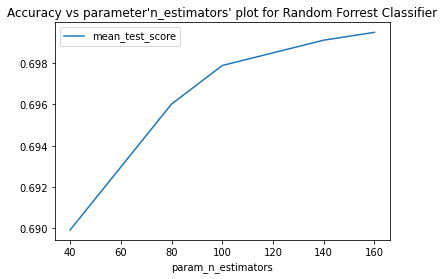

In [0]:
results.plot('param_n_estimators','mean_test_score', title="Accuracy vs parameter'n_estimators' plot for Random Forrest Classifier")

In [0]:
# Random Forrest
start_time = time.time()
classifier = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
classifier.fit(train_x, train_y)
# classifier.fit(features, labels)
rfTime = (time.time() - start_time)
print("Time taken by Random Forest Classifier: %s seconds " % rfTime)

Time taken by Random Forest Classifier: 190.7272548675537 seconds 


In [0]:
rfc_score = classifier.score(test_x, test_y)

In [0]:
y_pred = classifier.predict(test_x)
# y_pred

In [0]:
y_pred.argmax(axis=1)

array([ 2,  0,  0, ..., 13,  5, 12])

In [0]:
test_y.argmax(axis=1)

array([13,  0,  0, ..., 13,  1, 12])

In [0]:
confusionMatrix = metrics.confusion_matrix(test_y.argmax(axis=1),y_pred.argmax(axis=1))

In [0]:
dataframeConfusionMatrix = cm2df(confusionMatrix, labelsChar)
# dataframeConfusionMatrix

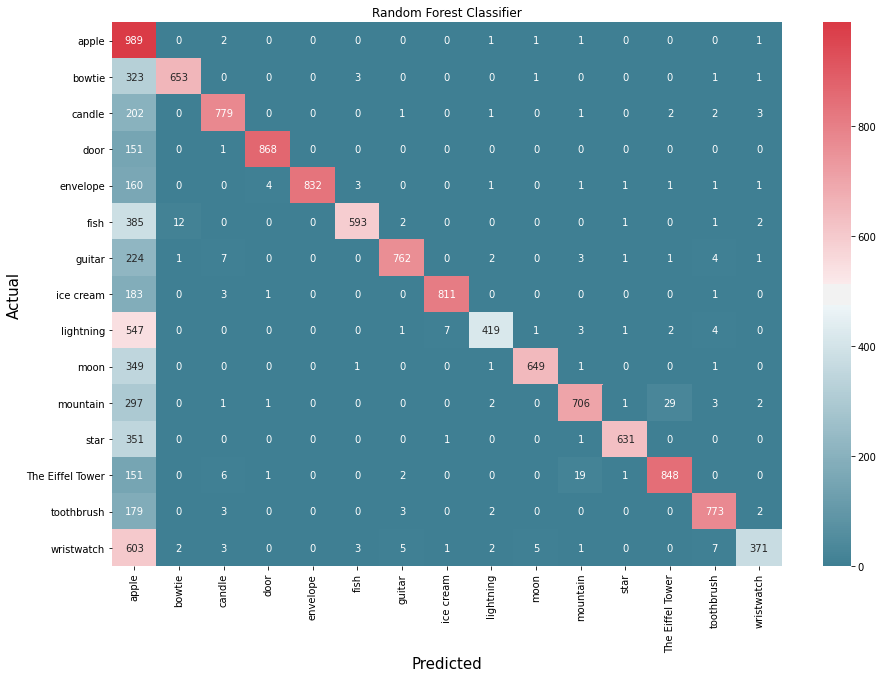

In [0]:
plt.figure(figsize=(15,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(dataframeConfusionMatrix, cmap=cmap, annot=True, fmt='d')
plt.xlabel('Predicted',size =15)
plt.ylabel('Actual', size =15)
plt.title("Random Forest Classifier")
#plt.show()
plt.savefig('/content/drive/My Drive/Colab Notebooks/CS7IS2 - Artificial Intelligence/Random Forest Classifier')

In [0]:
start_time = time.time()
knnClassifier = KNeighborsClassifier(n_neighbors = 5 ,n_jobs=-1)
knnClassifier.fit(train_x, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred = knnClassifier.predict(test_x)
knnTime = (time.time() - start_time)
print("Time taken by K Neighbors Classifier: %s seconds " % knnTime)
y_pred.argmax(axis=1)

Time taken by K Neighbors Classifier: 2434.81511759758 seconds 


array([ 7,  9,  4, ...,  2,  6, 13])

In [0]:
confusionMatrix = metrics.confusion_matrix(test_y.argmax(axis=1),y_pred.argmax(axis=1))

In [0]:
dataframeConfusionMatrix = cm2df(confusionMatrix, labelsChar)
# dataframeConfusionMatrix

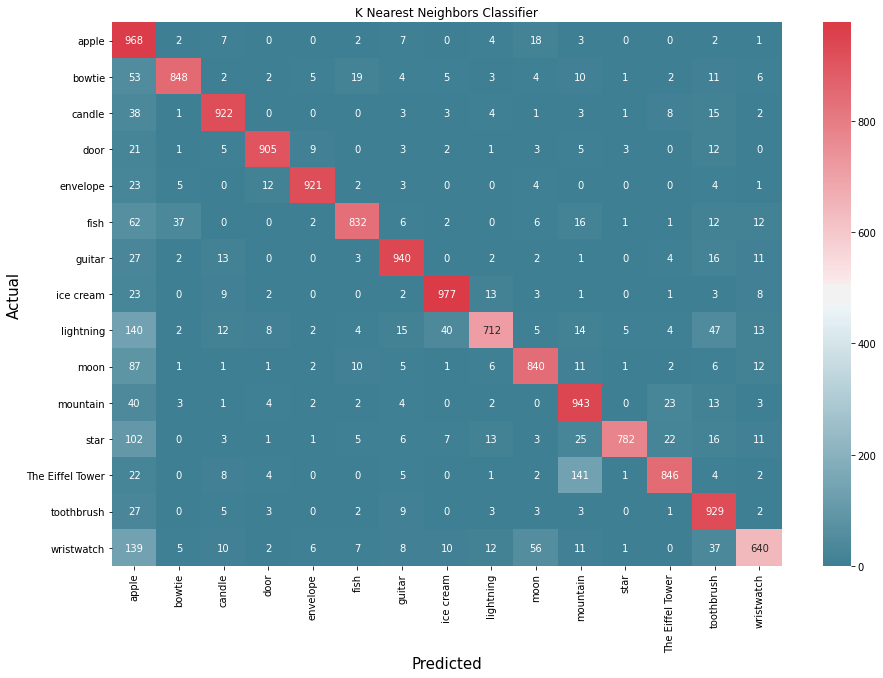

In [0]:
plt.figure(figsize=(15,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(dataframeConfusionMatrix, cmap=cmap, annot=True, fmt='d')
plt.xlabel('Predicted',size =15)
plt.ylabel('Actual', size =15)
plt.title("K Nearest Neighbors Classifier")
#plt.show()
plt.savefig('/content/drive/My Drive/Colab Notebooks/CS7IS2 - Artificial Intelligence/KNNClassifier')

In [0]:
y_pred.shape

(15000, 15)

In [0]:
test_y.shape

(15000, 15)

In [0]:
# knn_score = knnClassifier.score(test_y, y_pred)
knn_score = accuracy_score(test_y, y_pred)

In [0]:
# MLP Classifier
start_time = time.time()
classifier = MLPClassifier(hidden_layer_sizes=(784,), alpha = 0.001)
classifier.fit(train_x, train_y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(784,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [0]:
y_pred = classifier.predict(test_x)
mlpTime = (time.time() - start_time)
print("Time taken by MLP Classifier: %s seconds " % mlpTime)
y_pred.argmax(axis=1)

Time taken by MLP Classifier: 3572.2260851860046 seconds 


array([ 7,  9,  4, ...,  2,  6, 13])

In [0]:
mlp_score = classifier.score(test_x, test_y)

In [0]:
confusionMatrix = metrics.confusion_matrix(test_y.argmax(axis=1),y_pred.argmax(axis=1))

In [0]:
dataframeConfusionMatrix = cm2df(confusionMatrix, labelsChar)
# dataframeConfusionMatrix

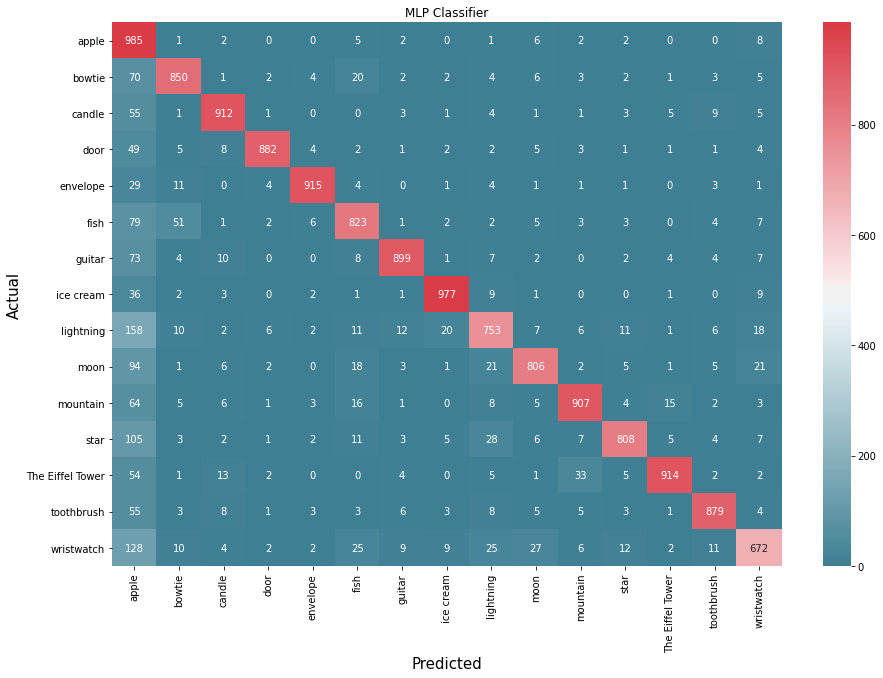

In [0]:
plt.figure(figsize=(15,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(dataframeConfusionMatrix, cmap=cmap, annot=True, fmt='d')
plt.xlabel('Predicted',size =15)
plt.ylabel('Actual', size =15)
plt.title("MLP Classifier")
#plt.show()
plt.savefig('/content/drive/My Drive/Colab Notebooks/CS7IS2 - Artificial Intelligence/MLPClassifier')

In [0]:
list(10.0 ** -np.arange(3, 5))

[0.001, 0.0001]

In [0]:
tuning_parameaters = {'hidden_layer_sizes' : [(100,), (784,), (100,100)],'alpha' : list(10.0 ** -np.arange(3, 5))}
clf_mlp = MLPClassifier(random_state=0)
mlp = GridSearchCV(clf_mlp, param_grid=tuning_parameaters, n_jobs=-1)


In [0]:
mlp.fit(features, labels)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(cv=None, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=0, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'

In [0]:
results=pd.DataFrame(mlp.cv_results_)
results.sort_values('mean_test_score', ascending = False)

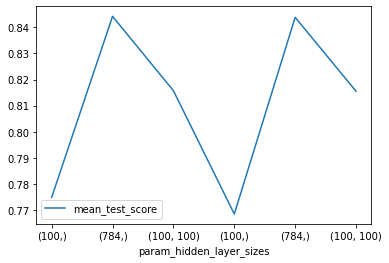

In [0]:
results.plot('param_hidden_layer_sizes','mean_test_score')

In [0]:
from sklearn.svm import SVC

In [0]:
data=[]
features = []
x = []
labels = []
count = 0
for file in dataset:
  file = data_directory_path + "/" + file
        # Load arrays from .npy files
  data = np.load(file)
        # Casting the int numpy.ndarray to float numpy.ndarray
        # Dividing it by 255 helps to get the RGB color
  data = data.astype('float32') / 255.
        # Extracting top 10000 rows and all columns
  data = data[0:10000, :]
        # Storing the extracted data from each file as feature
  features.append(data)
  x = [count for _ in range(10000)]
  count += 1
  x = np.array(x).astype('float32')
        # Reshaping the list to a single row 
  x = x.reshape(x.shape[0], 1)
        # Loading the created data as label
  labels.append(x)

In [0]:
features = np.array(features).astype('float32')
labels = np.array(labels).astype('float32')

features=features.reshape(features.shape[0]*features.shape[1],features.shape[2])
labels=labels.reshape(labels.shape[0]*labels.shape[1],labels.shape[2])

In [0]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, random_state=0,test_size=0.1)

In [0]:
clf = SVC(kernel='rbf')

In [17]:
t1 = time.time()
clf.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [22]:
y_pred = clf.predict(x_test)
svmTime = time.time() - t1
print ("Time taken by SVM: %s seconds " % svmTime)

Time taken by MLP Classifier: 16009.340703725815 seconds 


In [0]:
con = metrics.confusion_matrix(y_test,y_pred)
svm_score = accuracy_score(y_test,y_pred)
df_con = cm2df(con, labelsChar)

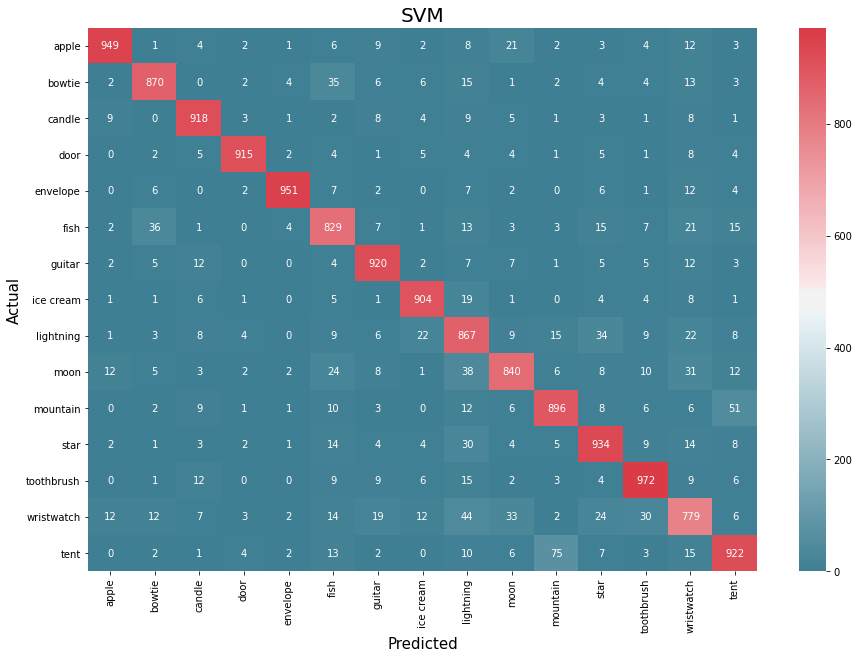

In [43]:
plt.figure(figsize=(15,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df_con, cmap=cmap, annot=True, fmt='d')
plt.xlabel('Predicted',size =15)
plt.ylabel('Actual', size =15)
plt.title('SVM',size=20)
#plt.show()
plt.savefig('/content/drive/My Drive/Colab Notebooks/CS7IS2 - Artificial Intelligence/SVM_CM')

# plt.figure(figsize=(15,10))
# cmap = sns.diverging_palette(220, 10, as_cmap=True)
# sns.heatmap(dataframeConfusionMatrix, cmap=cmap, annot=True, fmt='d')
# plt.xlabel('Predicted',size =15)
# plt.ylabel('Actual', size =15)
# plt.title("MLP Classifier")
# #plt.show()
# plt.savefig('/content/drive/My Drive/Colab Notebooks/CS7IS2 - Artificial Intelligence/MLPClassifier')

In [42]:
print ("SVM Score: ", svm_score, " ; Time taken by SVM to execute: ", svmTime)

SVM Score:  0.8977333333333334  ; Time taken by SVM to execute:  16009.340703725815


In [0]:
print ("CNN Loss: ", cnn_score[0])
print ("CNN Accuracy: ", cnn_score[1], " ; Time taken by CNN to execute: ", cnnTime)
print ("K-Means score: " , kmeans_score)
print ("Random Forest Classifier Score: ", rfc_score, " ; Time taken by Random Forest Classifier to execute: ", rfTime)


CNN Loss:  0.2067590282951792
CNN Accuracy:  0.9414  ; Time taken by CNN to execute:  386.41161847114563
K-Means score:  -833233.4
Random Forest Classifier Score:  0.7036666666666667  ; Time taken by Random Forest Classifier to execute:  188.14140582084656
Multi Layer Perceptron Classifier Score:  0.7780666666666667  ; Time taken by Random Forest Classifier to execute:  997.7946093082428


In [0]:
print ("K Nearest Neighbors Classifier Score: ", knn_score, " ; Time taken by KNN Classifier to execute: ", knnTime)

K Nearest Neighbors Classifier Score:  0.8657333333333334  ; Time taken by KNN Classifier to execute:  2434.81511759758


In [0]:
print ("Multi Layer Perceptron Classifier Score: ", mlp_score, " ; Time taken by Random Forest Classifier to execute: ", mlpTime)

Multi Layer Perceptron Classifier Score:  0.8468666666666667  ; Time taken by Random Forest Classifier to execute:  3572.2260851860046
